`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`pip install git+https://github.com/jbusecke/cmip6_preprocessing.git`

`mv *.png ../figures`

Also https://github.com/jbusecke/cmip6_preprocessing/blob/master/docs/postprocessing.ipynb 

In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from cmip6_preprocessing.postprocessing import interpolate_grid_label

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:

cat = col.search(
    variable_id=["thetao", "o2"],
    experiment_id=["historical"],
    source_id=["GFDL-ESM4", "CanESM5-CanOE"],
    table_id=["Omon"],
)
ddict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "use_cftime": True},
    aggregate=False,
    preprocess=combined_preprocessing,
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [8]:
list(ddict.keys())

['CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.Omon.thetao.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.nan.20190726',
 'CMIP.CCCma.CanESM5-CanOE.historical.r3i1p2f1.Omon.o2.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/historical/r3i1p2f1/Omon/o2/gn/v20190429/.nan.20190429',
 'CMIP.CCCma.CanESM5-CanOE.historical.r3i1p2f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/historical/r3i1p2f1/Omon/thetao/gn/v20190429/.nan.20190429',
 'CMIP.CCCma.CanESM5-CanOE.historical.r2i1p2f1.Omon.o2.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/historical/r2i1p2f1/Omon/o2/gn/v20190429/.nan.20190429',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.Omon.o2.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/o2/gr/v20190726/.nan.20190726',
 'CMIP.CCCma.CanESM5-CanOE.historical.r2i1p2f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/historical/r2i1p2f1/Omon/thetao/gn/v20190429/.nan.20190429',
 'CMIP.CCCma.CanESM5-CanOE.histori

What attributes does the collection of datasets need? 

In [9]:
combined_grids_dict = interpolate_grid_label(ddict, target_grid_label='gn')

/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:496: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


What are the limitations of this? What is `target_grid_label`? 

In [10]:
list(combined_grids_dict.keys())

['GFDL-ESM4.historical.Omon.r1i1p1f1',
 'CanESM5-CanOE.historical.Omon.r3i1p2f1',
 'CanESM5-CanOE.historical.Omon.r2i1p2f1',
 'CanESM5-CanOE.historical.Omon.r1i1p2f1']

### Ok, trying this with a couple of my models now

In [3]:

cat = col.search(
    variable_id=["talk"],
    experiment_id=["historical"],
    source_id=['GISS-E2-1-G-CC', 'CESM2'],
    table_id=["Omon"],
)
ddict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "use_cftime": True},
    aggregate=False,
    preprocess=combined_preprocessing,
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [4]:
list(ddict.keys())

['CMIP.NCAR.CESM2.historical.r7i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7i1p1f1/Omon/talk/gn/v20190311/.nan.20190311',
 'CMIP.NCAR.CESM2.historical.r2i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2i1p1f1/Omon/talk/gn/v20190308/.nan.20190308',
 'CMIP.NCAR.CESM2.historical.r4i1p1f1.Omon.talk.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4i1p1f1/Omon/talk/gr/v20190308/.nan.20190308',
 'CMIP.NCAR.CESM2.historical.r5i1p1f1.Omon.talk.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5i1p1f1/Omon/talk/gr/v20190308/.nan.20190308',
 'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.r1i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G-CC/historical/r1i1p1f1/Omon/talk/gn/v20190815/.nan.20190815',
 'CMIP.NCAR.CESM2.historical.r10i1p1f1.Omon.talk.gr.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r10i1p1f1/Omon/talk/gr/v20190313/.nan.20190313',
 'CMIP.NCAR.CESM2.historical.r9i1p1f1.Omon.talk.gn.gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9i1p1f1/Omon/tal

In [5]:
combined_grids_dict = interpolate_grid_label(ddict, target_grid_label='gn')

In [6]:
list(combined_grids_dict.keys())

['CESM2.historical.Omon.r7i1p1f1',
 'CESM2.historical.Omon.r2i1p1f1',
 'CESM2.historical.Omon.r4i1p1f1',
 'CESM2.historical.Omon.r5i1p1f1',
 'GISS-E2-1-G-CC.historical.Omon.r1i1p1f1',
 'CESM2.historical.Omon.r10i1p1f1',
 'CESM2.historical.Omon.r9i1p1f1',
 'CESM2.historical.Omon.r11i1p1f1',
 'CESM2.historical.Omon.r6i1p1f1',
 'CESM2.historical.Omon.r3i1p1f1',
 'CESM2.historical.Omon.r1i1p1f1',
 'CESM2.historical.Omon.r8i1p1f1']

So making `target_grid_label = 'gr'` throws a warning, and `GISS-E2-1-G-CC` (the `gn` model in this exam

In [7]:
combined_grids_dict2 = interpolate_grid_label(ddict, target_grid_label='gr')

/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:122: UserWarning: CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.r1i1p1f1.Omon.gn.none failed to combine with :Could not find any variable with the target_grid_labelgr. Found these instead: ['gn']
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")


In [8]:
list(combined_grids_dict2.keys())

['CESM2.historical.Omon.r7i1p1f1',
 'CESM2.historical.Omon.r2i1p1f1',
 'CESM2.historical.Omon.r4i1p1f1',
 'CESM2.historical.Omon.r5i1p1f1',
 'CESM2.historical.Omon.r10i1p1f1',
 'CESM2.historical.Omon.r9i1p1f1',
 'CESM2.historical.Omon.r11i1p1f1',
 'CESM2.historical.Omon.r6i1p1f1',
 'CESM2.historical.Omon.r3i1p1f1',
 'CESM2.historical.Omon.r1i1p1f1',
 'CESM2.historical.Omon.r8i1p1f1']

### Let's try a bunch of models now

In [ ]:
variables = ['dissic','talk', 'so', 'thetao']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
#              grid_label=['gn'],
              source_id=['IPSL-CM6A-LR', 'MPI-ESM1-2-LR', 'CNRM-ESM2-1', 
                         'CanESM5', 'MPI-ESM1-2-HR', 
                         'CESM2', 
                         'GISS-E2-1-G', 
                         'UKESM1-0-LL','ACCESS-ESM1-5', 'CanESM5-CanOE', 
                         'GISS-E2-1-G-CC', 'MPI-ESM-1-2-HAM']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dset_dict_old = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [4]:
combined_grids_dict = interpolate_grid_label(dset_dict_old, target_grid_label='gn')

NameError: name 'dset_dict_old' is not defined

What do those warnings mean?

In [29]:
list(combined_grids_dict.keys())

['CESM2.historical.Omon.r9i1p1f1',
 'CESM2.historical.Omon.r4i1p1f1',
 'CESM2.historical.Omon.r5i1p1f1',
 'CESM2.historical.Omon.r2i1p1f1',
 'CESM2.historical.Omon.r1i1p1f1',
 'CESM2.historical.Omon.r10i1p1f1',
 'CESM2.historical.Omon.r8i1p1f1',
 'CESM2.historical.Omon.r11i1p1f1',
 'CESM2.historical.Omon.r7i1p1f1',
 'CESM2.historical.Omon.r3i1p1f1',
 'CESM2.historical.Omon.r6i1p1f1']

So are all of those datasets now `gr`? (No)

I guess I can run `merge_variables` and `combine_datasets` now just to cut this down a bit

In [22]:
dd_new = merge_variables(combined_grids_dict)

In [23]:
temp={}
for name,item in dd_new.items():
    #print(name)
    #print(item.data_vars)
    present = item.data_vars
    if all(i in present for i in variables):
        #print(name)
        temp[name]=item
dd_new = temp
list(dd_new.keys())

['CESM2.gn.historical.Omon.r9i1p1f1',
 'IPSL-CM6A-LR.gn.historical.Omon.r14i1p1f1',
 'UKESM1-0-LL.gn.historical.Omon.r11i1p1f2',
 'IPSL-CM6A-LR.gn.historical.Omon.r6i1p1f1',
 'IPSL-CM6A-LR.gn.historical.Omon.r27i1p1f1',
 'MPI-ESM1-2-HR.gn.historical.Omon.r4i1p1f1',
 'CNRM-ESM2-1.gn.historical.Omon.r7i1p1f2',
 'CanESM5.gn.historical.Omon.r7i1p2f1',
 'CESM2.gn.historical.Omon.r4i1p1f1',
 'CanESM5.gn.historical.Omon.r15i1p1f1',
 'CanESM5.gn.historical.Omon.r25i1p1f1',
 'MPI-ESM1-2-LR.gn.historical.Omon.r7i1p1f1',
 'CanESM5.gn.historical.Omon.r4i1p1f1',
 'GISS-E2-1-G.gn.historical.Omon.r102i1p1f1',
 'CanESM5-CanOE.gn.historical.Omon.r1i1p2f1',
 'IPSL-CM6A-LR.gn.historical.Omon.r17i1p1f1',
 'CESM2.gn.historical.Omon.r5i1p1f1',
 'MPI-ESM1-2-LR.gn.historical.Omon.r4i1p1f1',
 'IPSL-CM6A-LR.gn.historical.Omon.r4i1p1f1',
 'CNRM-ESM2-1.gn.historical.Omon.r4i1p1f2',
 'CanESM5.gn.historical.Omon.r9i1p2f1',
 'IPSL-CM6A-LR.gn.historical.Omon.r29i1p1f1',
 'CNRM-ESM2-1.gn.historical.Omon.r8i1p1f2',
 'M

In [25]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

dd_new_new = combine_datasets(
    dd_new,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_new_new.keys())

['CESM2.gn.historical.Omon',
 'IPSL-CM6A-LR.gn.historical.Omon',
 'UKESM1-0-LL.gn.historical.Omon',
 'MPI-ESM1-2-HR.gn.historical.Omon',
 'CNRM-ESM2-1.gn.historical.Omon',
 'CanESM5.gn.historical.Omon',
 'MPI-ESM1-2-LR.gn.historical.Omon',
 'GISS-E2-1-G.gn.historical.Omon',
 'CanESM5-CanOE.gn.historical.Omon',
 'GISS-E2-1-G-CC.gn.historical.Omon',
 'MPI-ESM-1-2-HAM.gn.historical.Omon']

In [26]:
dd_new_new['CanESM5-CanOE.gn.historical.Omon']

<xarray.Dataset>
Dimensions:        (bnds: 2, lev: 45, time: 1980, vertex: 4, x: 360, y: 291)
Coordinates: (12/14)
  * x              (x) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * y              (y) int32 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
  * lev            (lev) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    lat            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    lev_bounds     (lev, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
    ...             ...
    lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    lon_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
  * bnds           (bnds) int64 0 1
  * vertex         (vertex) int64 0 1 2 3
    lon_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 291, 360), meta=np.ndarray>
    lat_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 291, 360), meta=np.ndarray>
Data variables:
    dissic         (time, lev, y, x) float32 dask.array<chunksize=(6, 45, 291, 360), meta=np.ndarray>
    thetao         (time, lev, y, x) float32 dask.array<chunksize=(5, 45, 291, 360), meta=np.ndarray>
    so             (time, lev, y, x) float32 dask.array<chunksize=(7, 45, 291, 360), meta=np.ndarray>
    talk           (time, lev, y, x) float32 dask.array<chunksize=(7, 45, 291, 360), meta=np.ndarray>
Attributes: (12/50)
    CCCma_model_hash:            932b659de600c6a0e94f619abaf9cc79eabcd337
    CCCma_parent_runid:          canoecpl-007
    CCCma_pycmor_hash:           3ecdc18eb7c1f7fbce0346850f41adf815d9fb66
    CCCma_runid:                 c2-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    table_info:                  Creation Date:(24 July 2019) MD5:c93735846d6...
    title:                       CanESM5-CanOE output prepared for CMIP6
    variant_label:               r1i1p2f1
    version:                     v20190429
    version_id:                  v20190429
    intake_esm_varname:          None

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(sl

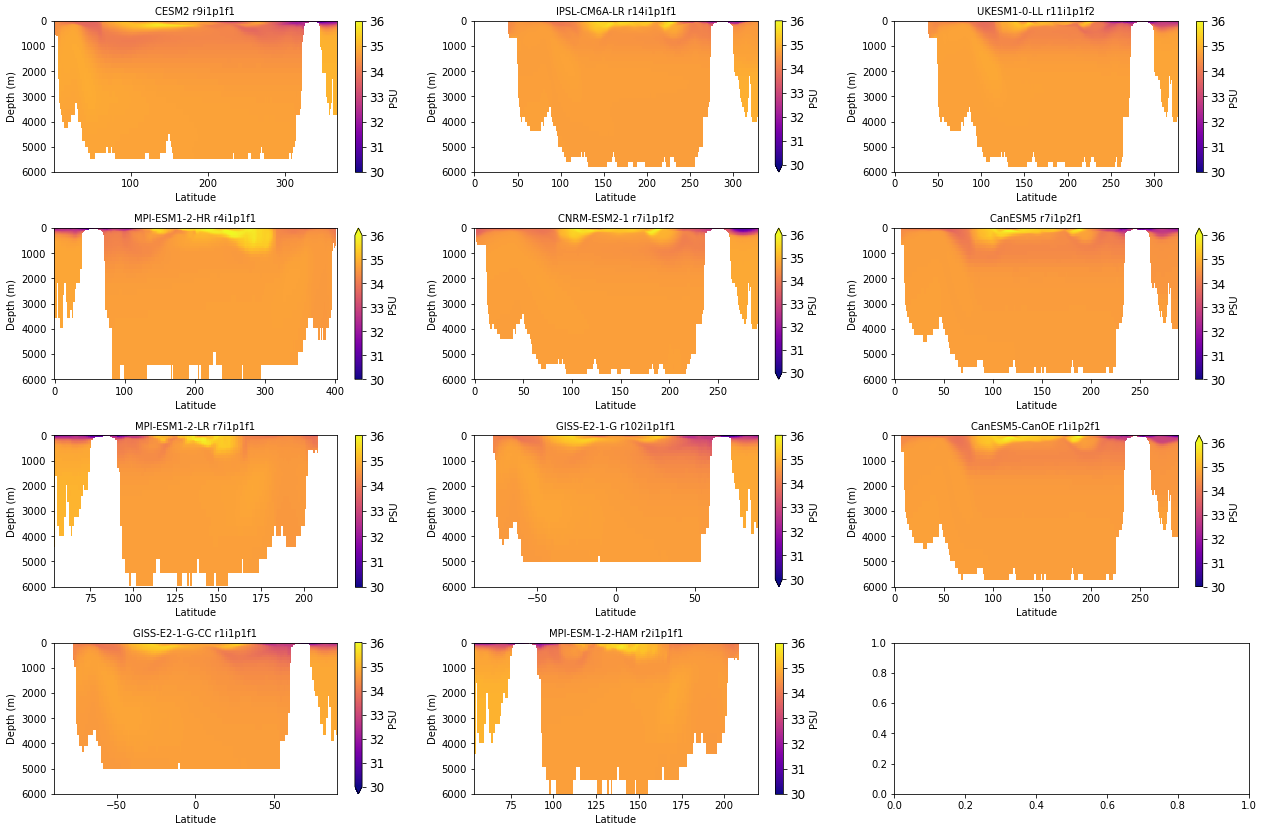

In [27]:
fig_so, axarr_so = plt.subplots(nrows = 4, ncols = 3, figsize=[18,12])
fig_so.tight_layout(pad = 3.5)
plt.rc('font', size = 12)
plt.rc('axes', titlesize= 10)    
plt.rc('axes', labelsize= 10)
plt.rc('figure', titlesize=14)

#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds_so in dd_new_new.items():
    ax = axarr_so.flat[ax_idx]
    so_section = ds_so.so.where(np.logical_and(ds_so.lon<=200, ds_so.lon>=180), drop=True).isel(time = 0).mean('x', keep_attrs=True)
    im = so_section.plot(x='y', y='lev', yincrease=False, cmap = 'plasma', vmin=30, vmax=36, ax = ax, cbar_kwargs={'label':'PSU'})
    ax.set_title(ds_so.attrs['source_id']+ ' '+ds_so.attrs['variant_label'])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim([6000, 0])
    ax_idx += 1 # this is a nifty python trick to increment a variable by one

So none of that is on `gr` so maybe target label should be `gr` not `gn`